In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#API Key Entry
consumer_key = input("Please enter twitter consumer key")
consumer_secret = input("Please enter twitter secret consumer key")
access_token = input("Please enter twitter token ID")
access_token_secret = input("Please enter twitter secret token")
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

accounts = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]


In [12]:
def tweet_frame(query):
    sentiments = []
    oldest_id = ''
    public_tweets = api.search(query, count=100,
                                   result_type="recent", max_id=oldest_id)
    for tweet in public_tweets['statuses']:
        text = tweet['text']
        scores = analyzer.polarity_scores(text)
        sentiments.append(scores)
        oldest_id = tweet['id_str']
    return pd.DataFrame(sentiments)
    
    

In [13]:
frames = []
for query in accounts:
    df = tweet_frame(query)
    df["account"] = query
    df["tweets_ago"] = df.index
    frames.append(df)
total_tweets = pd.concat(frames)
total_tweets.head()

,compound,neg,neu,pos,account,tweets_ago
0,0.5743,0.000,0.843,0.157,@BBC,0
1,0.5743,0.000,0.843,0.157,@BBC,1
2,-0.3134,0.094,0.906,0.000,@BBC,2
3,-0.3134,0.094,0.906,0.000,@BBC,3
4,0.0000,0.000,1.000,0.000,@BBC,4


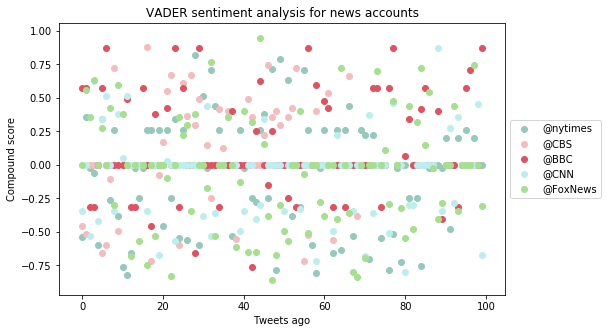

In [34]:
total_tweets.to_csv("tweet_data.csv")
plt.figure(figsize=(8, 5))
color_dict = {"@BBC" : "#e25161",
             "@CBS" : "#f4bcbe",
             "@CNN" : "#bceeed",
             "@FoxNews" : "#a5e08f",
             "@nytimes" : "#94C9BC"}


for kind in color_dict:
    d = total_tweets[total_tweets["account"]==kind]
    plt.scatter(d["tweets_ago"], d["compound"], color = color_dict[kind],marker = "o", label = kind)

plt.xlabel('Tweets ago')
plt.ylabel('Compound score')
title = ("VADER sentiment analysis for news accounts")
plt.title(title)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(title + ".png")
plt.show()

account
@BBC        0.111135
@CBS        0.075784
@CNN       -0.058522
@FoxNews   -0.041748
@nytimes   -0.058678
Name: compound, dtype: float64
['#94C9BC', '#f4bcbe', '#e25161', '#bceeed', '#a5e08f']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


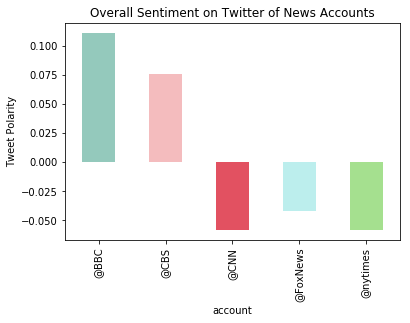

In [103]:
grouped = total_tweets.groupby("account")
average_sentiment = grouped.mean()

plt.title("Overall Sentiment on Twitter of News Accounts")
plt.ylabel("Tweet Polarity")
plt.xlabel("Account")


print(average_sentiment["compound"])
colors = list(color_dict.values())
print(colors)
ax = plt.gca()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
print(type(average_sentiment))
print(type(average_sentiment["compound"]))
bars = average_sentiment["compound"].plot.bar(color=[colors]) # need to wrap in a list cuz pandas bug

plt.show()